EXERCISE -1
Extract only the features of sepal length and petal length (feature column 0 and 2). Choose the last 100 samples from the 150 sample set (Versicolor and Virginica). Visualize the sample distribution in the two dimentional feature space. Use blue color to mark Versicolor, and green for Virginica.

In [296]:
import pandas as pd

In [297]:
df = pd.read_csv('iris.csv')

In [298]:
import numpy as np


class Perceptron(object):
      def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

      def fit(self, X, y):
       
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

      def net_input(self, X):
      
        return np.dot(X, self.w_[1:]) + self.w_[0]

      def predict(self, X):
        
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [299]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select virginica and versicolor using iloc function
y = df.iloc[51:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract two features, sepal length and petal length, again using iloc 
X = df.iloc[0:150, [0, 2]].values

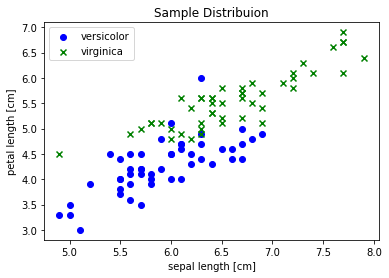

In [300]:
plt.scatter(X[51:100, 0], X[51:100, 1],
            color='blue', marker='o', label='versicolor')
plt.scatter(X[101:150, 0], X[101:150, 1],
            color='green', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Sample Distribuion')

 
plt.show()

Exercise 2:

Use the perceptron model to classifiy this sample set. Set eta = 0.1 and use 10 epochs. Plot the misclassification errors versus the number of 10 epochs

In [301]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

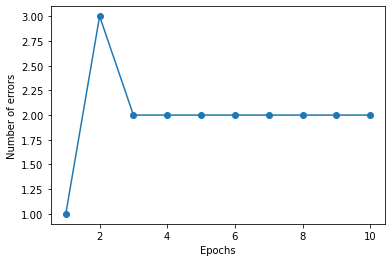

In [302]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

Exercise -3

Plot the misclassification errors versus the number of 100 epochs. Does the traning converge if we increase the epoch to 100? Can you explain why?

In [303]:
ppn = Perceptron(eta=0.1, n_iter=100)

ppn.fit(X, y)

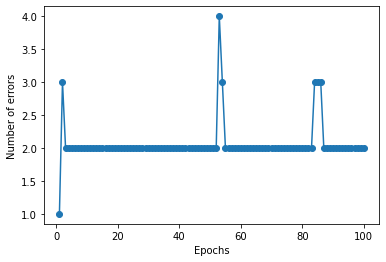

In [304]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [ ]:
### yes the training set will be converge if we incrsese the epchos to 100 because the data will become overfit and results in the same data iteration of data which will be more complex to understand 

when we declare y == 'Iris-virginca'

In [305]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select virginica and versicolor using iloc function
y = df.iloc[51:150, 4].values
y = np.where(y == 'Iris-virginica', -1, 1)

# extract two features, sepal length and petal length, again using iloc 
X = df.iloc[0:150, [0, 2]].values

Text(0.5, 1.0, 'Sample Distribuion')

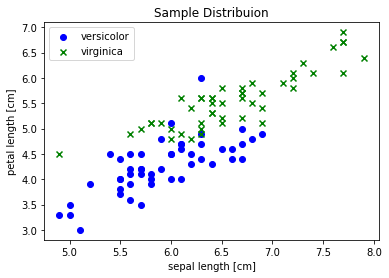

In [306]:
plt.scatter(X[51:100, 0], X[51:100, 1],
            color='blue', marker='o', label='versicolor')
plt.scatter(X[101:150, 0], X[101:150, 1],
            color='green', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Sample Distribuion')


In [307]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

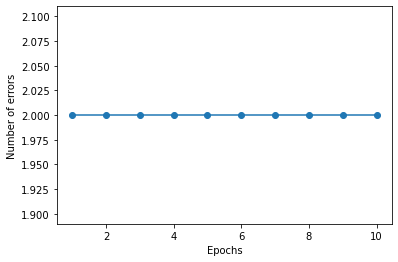

In [308]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [309]:
ppn = Perceptron(eta=0.1, n_iter=100)

ppn.fit(X, y)

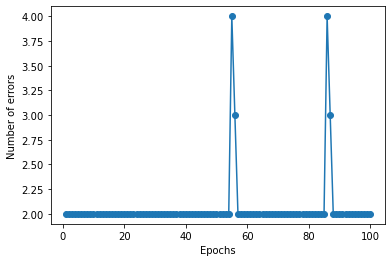

In [310]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [ ]:
# adiline Model

Exercise
Now let us use the Adaline model to work with the linearly non-separable dataset from the Perceptron exercise 1.

Extract only the features of sepal length and petal length (feature column 0 and 2). Choose the last 100 samples from the 150 sample set (Versicolor and Virginica).

The features need to be standardized.

Plot the converge graph with an epoch of 20 for learning rate eta=0.01.

In [311]:
import pandas as pd

df = pd.read_csv('iris.csv', header=None)

In [312]:
%matplotlib inline
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

In [313]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [314]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            print("Interation " + str(i))
            print(" Output: ")
            print(output)
            errors = (y - output)
            print(" Error: ")
            print(errors)
            delta_weight = X.T.dot(errors)
            print(" Delta Weight: ")
            print(delta_weight)
            self.w_[1:] += self.eta * delta_weight
            self.w_[0] += self.eta * errors.sum()
            print(" Updated weight (including W_0:) ")
            print(self.w_)
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [315]:
# select virginca and versicolor
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-virginica', -1, 1)

# extract sepal length and petal length
X = df.iloc[50:150, [0, 2]].values

In [316]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

17937708 -0.5683002  -0.93715334 -0.74298406 -0.08763421
 -0.09737692 -0.22357554 -0.68962746 -0.50032954]
 Error: 
[ 0.22837237  0.37405641  0.55848297  0.33044252  0.43715571  0.84985104
  0.70416701 -0.1792233   0.36918505  0.40328454  0.01494598  0.32069981
 -0.0094108   0.84010833 -0.26180803  0.03907445  0.91782171  0.2576005
  0.50999773  0.13140188  1.10711963 -0.07738146  0.96630695  0.84010833
  0.11191647  0.10704511  0.49538367  0.82549427  0.64593906 -0.46084866
  0.06830258 -0.06276739 -0.00453944  1.43235888  1.05376303  0.64593906
  0.43228436  0.3109571   0.39354183  0.33044252  0.8547224   0.70903836
  0.12653053 -0.24719396  0.5246118   0.45664113  0.45664113  0.24785779
 -0.70837454  0.32557116  0.40807662 -0.4316998  -0.26675865 -0.11620326
  0.00999536  0.31087783 -0.60638365  0.12157991 -0.12594597 -0.07258937
 -0.90749443 -0.57738383 -0.58712654 -0.4947991  -0.4316998  -0.57738383
 -0.38321455  0.37397714  0.63611708 -0.69871109 -0.39295726 -0.55789841
  0.37397

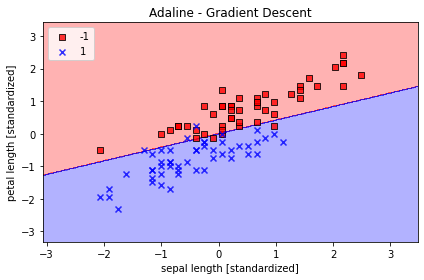

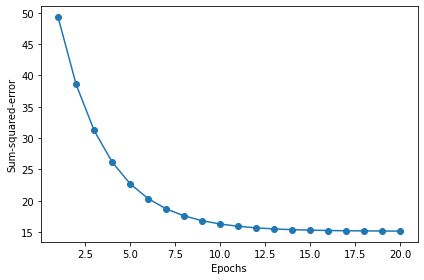

In [317]:
ada = AdalineGD(n_iter=20, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()
